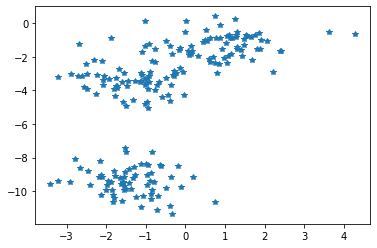

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt              # 시각화
import numpy as np

X, _ = make_blobs(n_samples = 200, random_state = 2, cluster_std = 0.8)     
# 등방성(모든 방향으로 같은 성질을 갖는) 가우시안 정규분포를 이용해서 가상의 데이터를 생성하는 함수 / n_samples: sample 개수 / cluster_std가 크면 넓게 분포를 할 거고 작으면 오밀조밀 분포를 하겠죠?
# print(X)       # x, y좌표 (100개)
plt.plot(X[:,0],X[:,1], '*')
plt.scatter(X[:,0],X[:,1], marker = '.')

In [ ]:
# 클러스터링 모델 만들기

model = KMeans(n_clusters = 3, init = 'random', n_init = 1, max_iter = 20, random_state = 8).fit(X)     # X를 넣어서 model에 대입
''' parameter 설명 
n_clusters: 군집 개수, 3
init: 처음 초기화 방법, 랜덤
n_init: multi-start k-means에서 설정하는 다중시작횟수 t, 일단 1로 잡아서 성능이 좋지 않음을 보기 위해
max_iter: 클러스터 배정-센트로이드 이동을 한번 반복이라고 하면 최대 반복 횟수, 10
random_state: seed...?
'''
# 각 센터에 대한 정보 받기
c0, c1, c2 = model.cluster_centers_   # cluster_centers_ 내부 변수를 이용해서 각 센터의 정보(위치) 확인
print(c0)
print(c1)
print(c2)

# 각 샘플별 배정 군집 정보
model.labels_

[ 0.93755168 -1.26286625]
[-1.3714895  -3.39223205]
[-1.40408454 -9.42878869]


array([1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2,
       1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2,
       0, 0], dtype=int32)

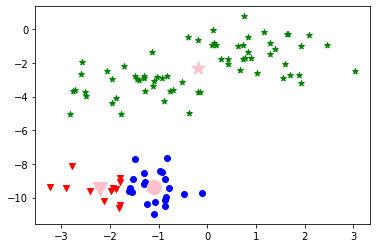

In [ ]:
# 시각화
# plt.scatter(X[:,0],X[:,1], marker = '.')                                                            # 전체 샘플      
plt.scatter(X[model.labels_ == 0,0], X[model.labels_ == 0,1], marker = 'v', facecolor = 'r')          # 0을 배정받은 샘플들 좌표(x, y)
plt.scatter(X[model.labels_ == 1,0], X[model.labels_ == 1,1], marker = '*', facecolor = 'g')          # 1을 배정받은 샘플들 좌표(x, y)
plt.scatter(X[model.labels_ == 2,0], X[model.labels_ == 2,1], marker = 'o', facecolor = 'b')          # 2를 배정받은 샘플들 좌표(x, y)

# centroid 점, (x,y) 좌표 찍기
plt.scatter(c0[0], c0[1], marker = 'v', s = 200, facecolor = 'pink')
plt.scatter(c1[0], c1[1], marker = '*', s = 200, facecolor = 'pink')
plt.scatter(c2[0], c2[1], marker = 'o', s = 200, facecolor = 'pink')

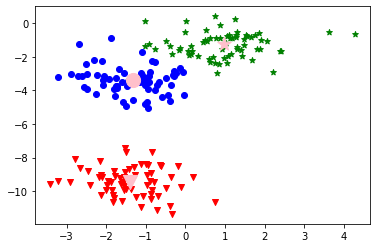

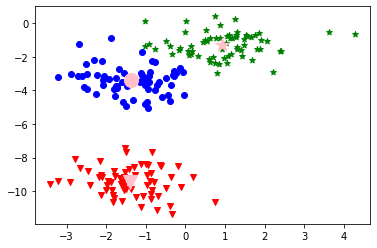

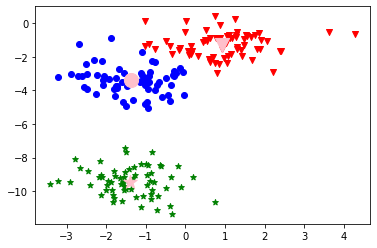

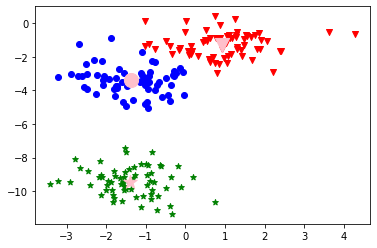

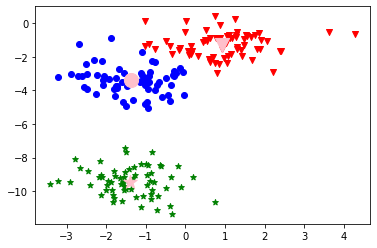

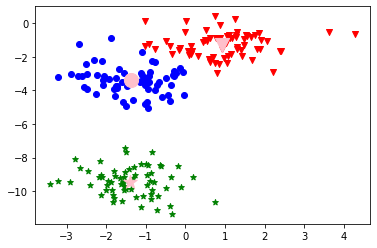

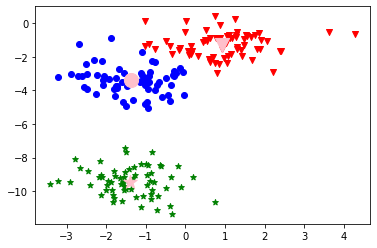

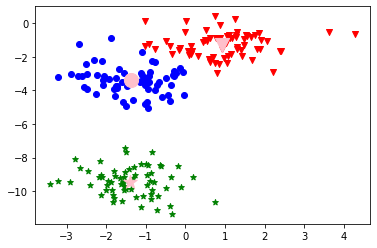

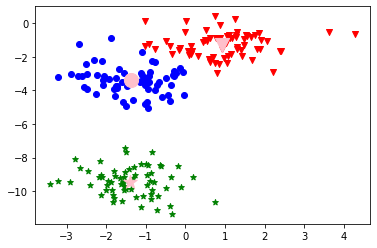

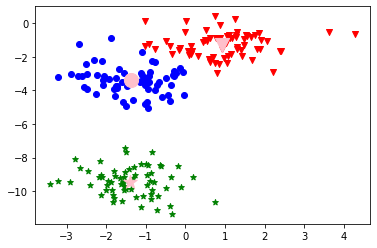

In [ ]:
# 함수 선언해서 군집 변화 보기

def plot_kmeans(n):
  model = KMeans(n_clusters = 3, init = 'k-means++', n_init = 5, max_iter = n, random_state = 10).fit(X)
  c0, c1, c2 = model.cluster_centers_

  plt.scatter(X[model.labels_ == 0,0], X[model.labels_ == 0,1], marker = 'v', facecolor = 'r')          
  plt.scatter(X[model.labels_ == 1,0], X[model.labels_ == 1,1], marker = '*', facecolor = 'g')          
  plt.scatter(X[model.labels_ == 2,0], X[model.labels_ == 2,1], marker = 'o', facecolor = 'b')          

  plt.scatter(c0[0], c0[1], marker = 'v', s = 200, facecolor = 'pink')
  plt.scatter(c1[0], c1[1], marker = '*', s = 200, facecolor = 'pink')
  plt.scatter(c2[0], c2[1], marker = 'o', s = 200, facecolor = 'pink')
  plt.pause(1)

for i in range(1, 11):
  plot_kmeans(i)